In [1]:
# Flech the data from the internet
import os
import tarfile
from six.moves import urllib
import pandas as pd

In [2]:
download_path = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
housing_path = os.path.join("datasets", "housing")
housing_url = download_path + "datasets/housing/housing.tgz"

In [3]:
# Write a function to flech the dataset
def fletch_housing_data(housing_url=housing_url, housing_path=housing_path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path) # create housing_path if not exist
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path) # Retrive .tgz file from the housing url
    housing_tgz = tarfile.open(tgz_path) # Open the .tgz file
    housing_tgz.extractall(path=housing_path) # Extract the file into housing path
    housing_tgz.close()
    

In [4]:
fletch_housing_data()

In [5]:
# Function to load the data set
def load_housing_data():
    r_d = pd.read_csv(housing_path + "/housing.csv")
    #r_d = pd.read_csv(os.path.join(housing_path, "housing.csv"))
    return r_d
housing_data = load_housing_data()

In [6]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# Get a quick description
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
# Get number of district by category
housing_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
# Summary of numeric attributes
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


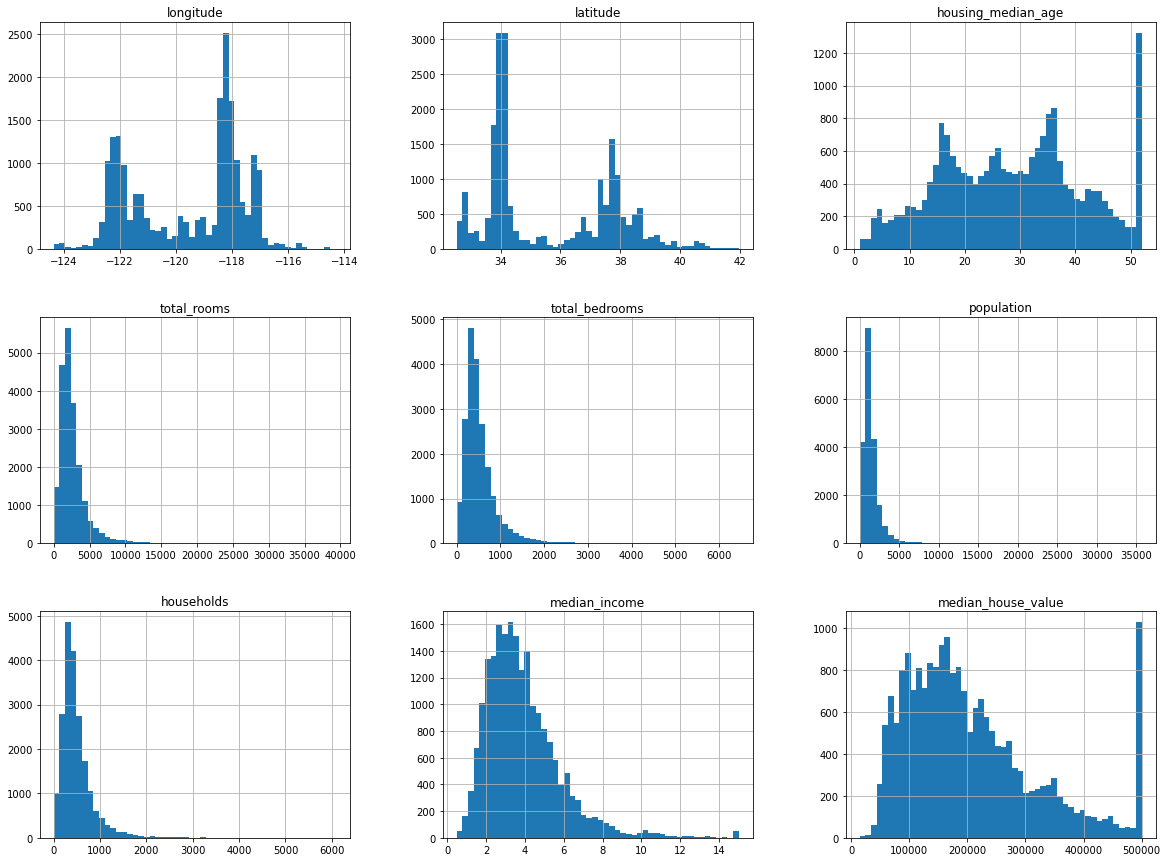

In [10]:
# Plot each numerical attribute with hist()
%matplotlib inline
import matplotlib.pyplot as plt
housing_data.hist(bins=50, figsize=(20,15))
plt.show()

### Splite the data

In [11]:
# Let split the data and keep test set 
import numpy as np
# Create a function to splite the data set
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) #shuffle the dataset
    test_set_size = int(len(data) * test_ratio) # test size
    test_indices = shuffled_indices[:test_set_size] # get test set indice
    train_indices = shuffled_indices[test_set_size:] # get train set indice
    
    return data.iloc[train_indices], data.iloc[test_indices]
    
train_set, test_set = split_train_test(housing_data, 0.2)   

In [12]:
print(f"The training set length is:{len(train_set)}")
print(f"The testing set length is:{len(test_set)}")

The training set length is:16512
The testing set length is:4128


In [13]:
# Keep the test set consitent cross multiple runs.
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing_data.reset_index() #add index column
train_set , test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
    

In [14]:
housing_with_id['id'] = housing_data['longitude'] * 1000 + housing_data['latitude']
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'id')

In [15]:
print(f"The training set length is:{len(train_set)}")
print(f"The testing set length is:{len(test_set)}")

The training set length is:16322
The testing set length is:4318


In [16]:
# Use the Scikit-Learn train_test_split function
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

In [17]:
# Create an income category
housing_data['income_cat'] = pd.cut(housing_data['median_income'], 
                            bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
                            labels=[1,2,3,4,5])


<AxesSubplot:>

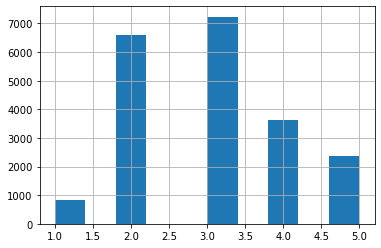

In [18]:
housing_data['income_cat'].hist()

In [19]:
# Let's do a stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data['income_cat']):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]
    

In [20]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [21]:
# Remove income_cat attribute so the data is back to its original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

### Exploring the data

In [22]:
# Get the copy of the training set
housing = strat_train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


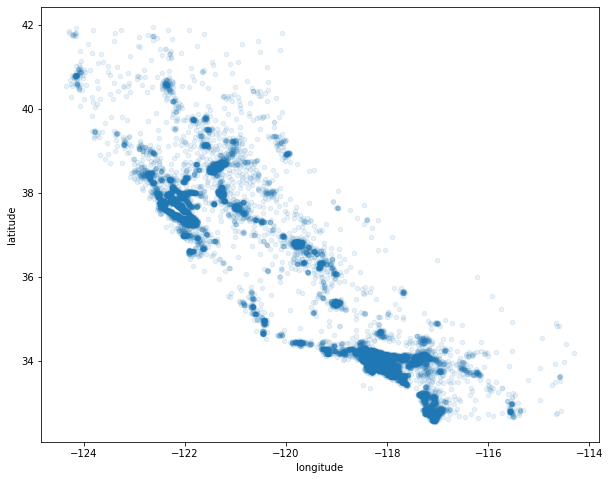

In [23]:
# Visualizing the data Geographicaly
housing.plot(kind='scatter', x='longitude', y='latitude', figsize=(10,8), alpha=0.1)
plt.show()

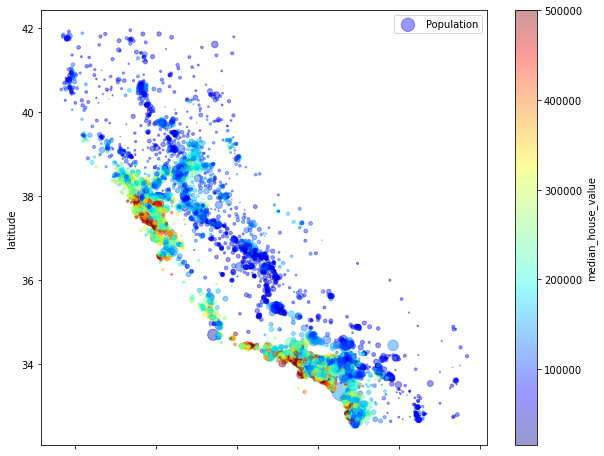

In [24]:
# Take a look on the housing prices and the population base on the district
housing.plot(kind='scatter', x='longitude', y='latitude', s=housing['population']/100, label='Population',
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True, figsize=(10,8), alpha=0.4)
plt.legend()
plt.show()

In [25]:
# Get correlation between attribute
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [26]:
# Get hoe much each attribute is correlates to the mdeian_house_value
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

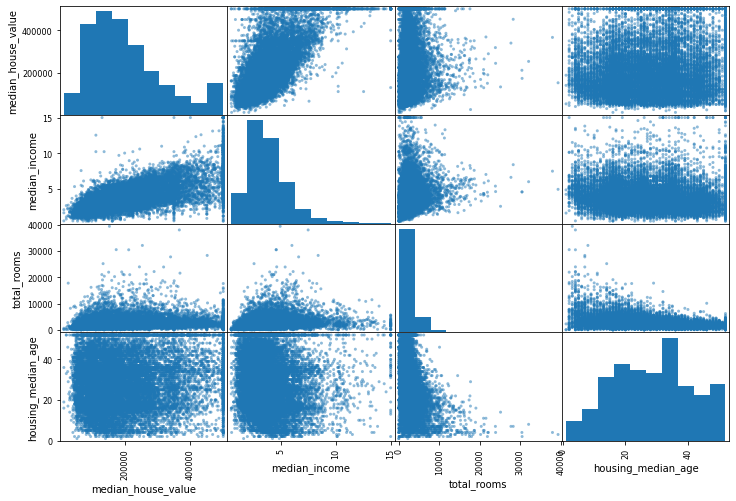

In [27]:
# Use Pandas’ scatter_matrix function to get the correlation
from pandas.plotting import scatter_matrix

# Select few attibutes 
attributes = ["median_house_value", "median_income", "total_rooms",
                  "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

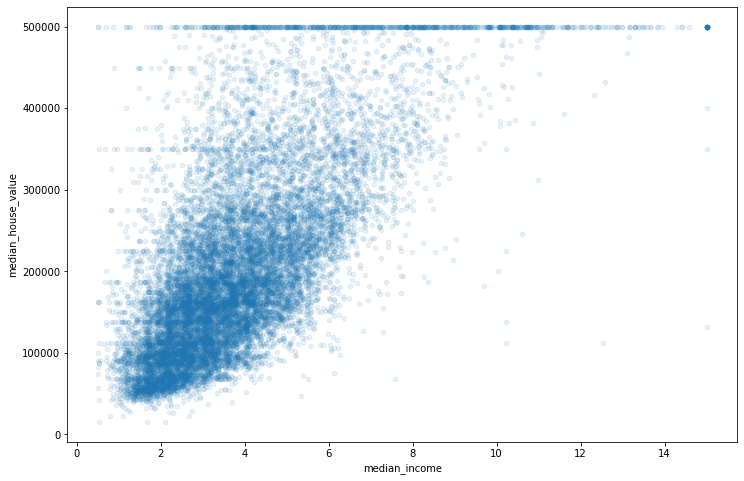

In [28]:
# zoom in on median_house_value and median_income correlation scatterplot 
housing.plot(kind='scatter', x='median_income', y='median_house_value', figsize=(12,8), alpha=0.1)
plt.show()

In [29]:
# Create combiant attributes
housing["rooms_per_household"] = housing['total_rooms']/ housing['households']
housing["bedrooms_per_room"] = housing['total_bedrooms']/ housing['total_rooms']
housing["population_per_household"] = housing['population']/housing['households']

In [30]:
# Check on the correlation matrix again
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

### Prepare the Data for Machine Learning Algorithms

In [31]:
# Separate the predictors and the labels
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

#### Data Cleaning

In [32]:
# Replace the missing values by the median
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

# Get only numerical attribute
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [33]:
# Compaire the two median values
print(housing_num.median().values)
imputer.statistics_


[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [34]:
# Transform the training set by replacing missing values by the learned medians
X = imputer.transform(housing_num)

# Put the data back into a pandas dataframe
housing_tr = pd.DataFrame(X, columns = housing_num.columns)

In [35]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [36]:
# Check if there is still mising values 
housing_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

#### Handling Text and Categorical Attributes

In [37]:
housing_cat = housing[['ocean_proximity']]
housing_cat

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


In [38]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [39]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [40]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [41]:
# Use OneHotEncoder to categories from text to numbers
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

In [42]:
housing_cat_onehot = cat_encoder.fit_transform(housing_cat)
housing_cat_onehot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [43]:
housing_cat_onehot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [44]:
# Transformer class that adds the combined attributes
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room 
    def fit(self, X, y=None):
        return self # nothing else to do 
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix] 
        population_per_household = X[:, population_ix] / X[:, households_ix] 
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
                return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [45]:
#Transformation Pipelines

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [46]:
# Pipeline for numerical values
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                       ('attribs_adder', CombinedAttributesAdder()),
                       ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)                   

In [47]:
# apply all the transformations to the housing data
from sklearn.compose import ColumnTransformer

In [48]:
num_attribs = list(housing_num) #get the list of the numerical column names
cat_attibs = ['ocean_proximity'] #get the list of categorical column names


# The constructor contains a name, a transformer and a list of names (or indices) of columns that the transformer should be applied to
full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs),
                          ('cat', OneHotEncoder(), cat_attibs),    
])
housing_prepared = full_pipeline.fit_transform(housing)

In [49]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

### Select and Train a Model

In [50]:
# Linear regression
from sklearn.linear_model import LinearRegression

l_reg = LinearRegression()
l_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [51]:
# let's try the model on some data
some_data = housing.iloc[:5]
some_data
some_labels = housing_labels.iloc[:5]
some_labels

some_data_prepared = full_pipeline.transform(some_data)
print(f"Prediction:{l_reg.predict(some_data_prepared)}")
print(f"Labels:{list(some_labels)}")

Prediction:[ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels:[72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [52]:
# measure this regression model’s RMSE 
from sklearn.metrics import mean_squared_error

housing_predictions = l_reg.predict(housing_prepared)
l_mse = mean_squared_error(housing_predictions, housing_labels)
l_rmes = np.sqrt(l_mse)
print(f"The RMSE:{l_rmes}")

The RMSE:68627.87390018745


Most districts’ median_housing_values range between $120000 and $265000, so a typical prediction error of $68,628 is not very satisfying.

 This is an example of a model underfitting the training data.

In [53]:
# DecisionTreeRegressor model
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

In [54]:
# fit the model
tree_reg.fit(housing_prepared, housing_labels)

# make the prediction
housing_prediction = tree_reg.predict(housing_prepared)

In [55]:
# Get rmse
tree_mse = mean_squared_error(housing_prediction, housing_labels)
tree_rmse = np.sqrt(tree_mse)
print(f"Decison Tree RMSE:{tree_rmse}")

Decison Tree RMSE:0.0


With a rmes 0.0 it more likely mean the model has overfit the data.

In [56]:
# use cross-validation feature
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmes_scores = np.sqrt(-scores)

In [57]:
def display_score(scores):
    print(f"Score:{scores}")
    print(f"Mean:{scores.mean()}")
    print(f"Standard Deviation:{scores.std()}")
    
display_score(tree_rmes_scores)

Score:[72294.1620014  70713.90501271 68309.36885918 71241.45018536
 70173.52610837 77442.91074023 70854.23727172 73455.93106346
 68775.50979517 72067.38884617]
Mean:71532.83898837758
Standard Deviation:2460.691032252439


With a mean of 71333 Decision tree seems to perform worse than the Linear Regression model.

In [58]:
# calculate the linear regression score with cross validation
lg_scores = cross_val_score(l_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)
lg_rmes_scores = np.sqrt(-lg_scores)

display_score(lg_rmes_scores)

Score:[71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:69104.07998247063
Standard Deviation:2880.3282098180634


The Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.

In [59]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [60]:
housing_prediction = forest_reg.predict(housing_prepared)

In [61]:
# random forest rmes
forest_mse = mean_squared_error(housing_prediction, housing_labels)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

18820.99392062761


18646 is way better.

In [62]:
# cross validation for the random forest
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse = np.sqrt(-forest_scores)

In [63]:
display_score(forest_rmse)

Score:[51481.19181995 48860.41272515 46759.27371279 52074.16052259
 47468.83547675 51987.57577648 52596.31234728 49969.90033885
 48391.34958056 53707.39771602]
Mean:50329.64100164061
Standard Deviation:2250.3767308793904


In [64]:
# Save the model with joblib
#from sklearn.externals import joblib

#joblib.dump(my_model,"my_model.pck")

#my_model_loaded = joblib.load("my_model.pck")

In [70]:
# Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'n_estimators': [3, 10, 30, 40, 50], 'max_features': [2, 4, 6, 8, 10, 12]},
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                               scoring='neg_mean_squared_error',
                               return_train_score=True)



In [71]:
grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8, 10, 12],
                          'n_estimators': [3, 10, 30, 40, 50]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [72]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 50}

In [73]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=50)

In [75]:
#### cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63929.728945065835 {'max_features': 2, 'n_estimators': 3}
54788.53031107946 {'max_features': 2, 'n_estimators': 10}
52988.41035514536 {'max_features': 2, 'n_estimators': 30}
52715.97728067493 {'max_features': 2, 'n_estimators': 40}
51900.20654619637 {'max_features': 2, 'n_estimators': 50}
60790.15782042419 {'max_features': 4, 'n_estimators': 3}
52984.52906461665 {'max_features': 4, 'n_estimators': 10}
50392.60154018075 {'max_features': 4, 'n_estimators': 30}
50172.33456366756 {'max_features': 4, 'n_estimators': 40}
49805.7477356052 {'max_features': 4, 'n_estimators': 50}
57992.58949957473 {'max_features': 6, 'n_estimators': 3}
51879.54822693551 {'max_features': 6, 'n_estimators': 10}
49883.49772121592 {'max_features': 6, 'n_estimators': 30}
49753.350299597005 {'max_features': 6, 'n_estimators': 40}
49501.041665186254 {'max_features': 6, 'n_estimators': 50}
59902.96725850134 {'max_features': 8, 'n_estimators': 3}
52348.106317946935 {'max_features': 8, 'n_estimators': 10}
50020.752053176

With grid_search the best result 49501 was obtain with {'max_features': 6, 'n_estimators': 50}

In [78]:
# get the importtance of each features with randon forest regressor
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.38242168e-02, 6.90524482e-02, 4.25846952e-02, 1.83116981e-02,
       1.64907805e-02, 1.78749550e-02, 1.62824094e-02, 3.44574786e-01,
       5.97477903e-02, 1.05426274e-01, 6.79028625e-02, 1.31247713e-02,
       1.45944430e-01, 7.63925329e-05, 3.90013813e-03, 4.88135213e-03])

In [125]:
# Display the score next to their coresponding attibutes name
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_['cat']
cat_encoder
cat_one_hot_attribs = list(cat_encoder.categories_[0])
cat_one_hot_attribs
attributs = num_attribs + extra_attribs + cat_one_hot_attribs
attributs
sorted(zip(feature_importances, attributs), reverse=True)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_hhold',
 'pop_per_hhold',
 'bedrooms_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [91]:
# Evaluate the system on the test set
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

# apply fullpipeline to the test set (apply transform() not fit_transform())

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mes = mean_squared_error(y_test, final_predictions)
final_rmes = np.sqrt(final_mes)
final_rmes

47333.85265592822

In [93]:
# Claculate 95% confidence interval for the generalization error 
from scipy import stats
confidence = 0.95

squared_error = (final_predictions - y_test)** 2
squared_error

np.sqrt(stats.t.interval(confidence, len(squared_error)-1,
                         loc=squared_error.mean(),
                         scale=stats.sem(squared_error)
                        ))

array([45340.85312796, 49246.26130109])

In [114]:
# Full pipeline with preparation and prediction
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([ 85657.90192014, 305492.60737488, 152056.46122456, 186095.70946094,
       244550.67966089])

#### 1.
Try a Support Vector Machine regressor (sklearn.svm.SVR), with various hyper‐ parameters such as kernel="linear" (with various values for the C hyperpara‐ meter) or kernel="rbf" (with various values for the C and gamma hyperparameters). Don’t worry about what these hyperparameters mean for now. How does the best SVR predictor perform?

In [120]:
from sklearn.svm import SVR
svr_reg = SVR()
svr_params = [
    {'kernel':['linear'], 'C':[10., 30., 100., 300., 1000., 3000., 10000., 30000.0] },
    {'kernel':['rbf'], 'C':[1.0, 3.0, 10., 30., 100., 300., 1000.0], 'gamma':[0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    
]

grid_search_svr = GridSearchCV(svr_reg, svr_params, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search_svr.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   9.6s
[CV] END ..............................C=10.0, kernel=linear; total time=   9.4s
[CV] END ..............................C=10.0, kernel=linear; total time=   9.3s
[CV] END ..............................C=10.0, kernel=linear; total time=   9.2s
[CV] END ..............................C=10.0, kernel=linear; total time=   8.9s
[CV] END ..............................C=30.0, kernel=linear; total time=   8.9s
[CV] END ..............................C=30.0, kernel=linear; total time=   9.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   8.9s
[CV] END ..............................C=30.0, kernel=linear; total time=   8.8s
[CV] END ..............................C=30.0, kernel=linear; total time=  10.7s
[CV] END .............................C=100.0, kernel=linear; total time=   9.8s
[CV] END .............................C=100.0, 

[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  20.4s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  21.0s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  19.8s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  18.4s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  19.5s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  18.9s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  19.8s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  18.0s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  19.2s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=  20.6s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=  19.6s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=  18.6s
[CV] END ...................

KeyboardInterrupt: 

In [ ]:
# get the best paramaters
grid_search_svr.best_params_

In [ ]:
# get the best score
neg_svr_score= grid_search_svr.best_score_
rmes_svr_score = np.sqrt(-neg_svr_score)
rmes_svr_score

#### 2.
Try replacing GridSearchCV with RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, expon

params_distribs= {
    'kernel':['linear','rfb'],
    'C':reciprocal(20,200000),
    'gamma':expon(scale=1.0),
}

random_search = RamdomixaedSearchCV(svr_reg, params_distribs, n_iter= 50, cv=5, scoring='neg_mean_squared_error',
                                   verbose=2, random_states=42)
random_search.fit(housing_prepared, housing_labels)

In [ ]:
# Get the best estimator
random_searc.best_estimators_

In [ ]:
# Get the best score
neg_score = random_search.best_score_
rmes_random_score = np.sqrt(neg_score)
rmes_random_score

#### 3
Try adding a transformer in the preparation pipeline to select only the most
important attributes.

In [121]:
from sklearn.base import BaseEstimator, TransformerMixin

# Get the top k attribuste indice
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

# Get the top k feartures
class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [148]:
# Get the top 6 indices
k=15
top_k_feature_indices = indices_of_top_k(feature_importances,k)
top_k_feature_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15])

In [149]:
# Get the top k indices's labels
np.array(attributs)[top_k_feature_indices]

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room',
       '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype='<U18')

In [150]:
# Get top k indices with labels  
sorted(zip(feature_importances, attributs), reverse=True)[:k]

[(0.344574785999805, 'median_income'),
 (0.1459444300258224, 'INLAND'),
 (0.10542627384427762, 'pop_per_hhold'),
 (0.07382421678895187, 'longitude'),
 (0.0690524482226257, 'latitude'),
 (0.06790286252431726, 'bedrooms_per_room'),
 (0.05974779026695277, 'rooms_per_hhold'),
 (0.042584695238976886, 'housing_median_age'),
 (0.01831169809292011, 'total_rooms'),
 (0.017874955034254007, 'population'),
 (0.016490780465599222, 'total_bedrooms'),
 (0.016282409410732536, 'households'),
 (0.013124771294972583, '<1H OCEAN'),
 (0.00488135213031945, 'NEAR OCEAN'),
 (0.003900138126539289, 'NEAR BAY')]

In [151]:
# create pipeline with previously defined preparation pipeline, and adds top k feature selection
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [152]:
# Let's look at the features of the first 6 instances
housing_prepared_top_k_features[0:6]

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.43743108, -0.63581817, -0.13148926,  0.42717947,  0.27279028,
         0.37406031,  0.22089846,  0.32575178, 

In [153]:
# Now let's double check that these are indeed the top k features
housing_prepared[0:6, top_k_feature_indices]

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.43743108, -0.63581817, -0.13148926,  0.42717947,  0.27279028,
         0.37406031,  0.22089846,  0.32575178, 

#### 4.
Try creating a single pipeline that does the full data preparation plus the final prediction.

In [164]:
prepare_select_and_predict_pipeline= Pipeline([
    ('preparation', full_pipeline),
    ('feature_seletion', TopFeatureSelector(feature_importances, k)),
    ('model', RandomForestRegressor(**grid_search.best_params_))
])

# prepare_select_and_predict_pipeline = Pipeline([
#     ('preparation', full_pipeline),
#     ('feature_selection', TopFeatureSelector(feature_importances, k)),
#     ('svm_reg', SVR(**rnd_search.best_params_))
# ])

In [165]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                    

In [166]:
# Let's try the full pipeline on a few instances

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 76570. 293248.  83054. 125682. 229220.]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


#### 5.
Automatically explore some preparation options using GridSearchCV.

In [ ]:
full_pipeline.named_transformers_["cat"].handle_unknown = 'ignore'

param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

In [ ]:
grid_search_prep.best_params_